In [10]:
import matplotlib as plt
import numpy as np
import pandas as pd
from system import *

In [16]:
# importing sag a data

sagAdat = pd.read_excel("SagittariusA_data.xlsx")

# puting the data in a more usable form
sagAdat["q(m)"] = sagAdat["q (AU)"]*1.496e11 # Converting from 'AU' to 'm'
sagAdat["z"] = sagAdat["q(m)"]*np.sin(sagAdat["i (°)"]*np.pi/180) # Finding 'z' position at perihelion 
                                                                  # in cartesian coords
sagAdat["v(m/s)"] = sagAdat["v (%c)"]*0.01*3e8 # converting star speed to m/s

In [29]:
sagAdat["z"]

0    2.823289e+14
1    1.276072e+13
2    9.388914e+13
3    2.256893e+13
4    7.764104e+13
5    8.234908e+12
6    2.343211e+12
7    1.491425e+12
Name: z, dtype: float64

In [19]:
# Initializing a list of star objects using the information from the dataset 
# Excluding last 3 stars due to their relativistic motion

st_list = []
for i in range(len(sagAdat["q(m)"])-3):
    st_list.append(star([sagAdat["q(m)"][i],0,sagAdat["z"][i]],[0,sagAdat["v(m/s)"][i],0]))

In [21]:
%reload_ext autoreload
%autoreload 2
%pylab
%matplotlib inline

tf = 3.154e+7*166 # how long the simulation runs (in seconds)
dt = 3.154e+7/10000 # how long between each timestep (also in seconds)
M = 2e30*4e6 # mass of central black hole

test_system = system3d(st_list,M)

test_system.iterate(tf,dt)

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


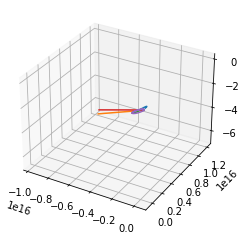

In [28]:
# Testing iteration function
fig = plt.figure()
ax = plt.axes(projection='3d')
for i in range(len(st_list)):
    ax.plot(st_list[i].r[:,0],st_list[i].r[:,1],st_list[i].r[:,2])

KeyboardInterrupt: 

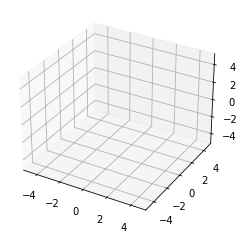

In [24]:
# plotting the 3D model
tbnd = 5000 * 1.496e11 # making plot boundaries

test_system.plot([-tbnd,tbnd],[-tbnd,tbnd],[-tbnd,tbnd])